## Mini-Batch Gradient Descent 
### code from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
x,y = load_diabetes(return_X_y=True)

In [3]:
x.shape, y.shape

((442, 10), (442,))

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
reg = LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)
print("r2 SCore: ", r2_score(y_test, pred))

r2 SCore:  0.4526027629719197


In [6]:
print('reg.coef_: ',reg.coef_)
print('reg.intercept_: ',reg.intercept_)

reg.coef_:  [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
reg.intercept_:  151.34560453985995


In [24]:
import random
class MiniBatchGDR:
    
    def __init__(self, batches, learning_rate=0.01, epochs=100):
        self.coeff = None
        self.intercept = None
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batches = batches
    
    def fit(self, x_train, y_train):
        self.intercept = 0
        # since we dont know the number of coefficient in advanced
        # Then, how can we get the number of coeff???
        # using x_train ---> # of columns
        self.coeff = np.ones(x_train.shape[1])
        
        for i in range(self.epochs):
            # This loop run for n rows
            for j in range(int(x_train.shape[0]/self.batches)):
                # selecting # of rows = # of batches
                idx = random.sample(range(0, x_train.shape[0]), self.batches)
                
                y_hat = np.dot(x_train[idx], self.coeff) + self.intercept
                # y_hat gives a scalar quantity
                
                # calculate derivative for single value, 
                intercept_der = -2*np.mean(y_train[idx]-y_hat)
                
                self.intercept = self.intercept - (self.learning_rate*intercept_der)
                
                coeff_der = -2 * np.dot((y_train[idx] - y_hat),x_train[idx])
                self.coeff = self.coeff - (self.learning_rate * coeff_der)
                
        print("self.intercept: ", self.intercept)
        print("self.coeff: ", self.coeff)
        
        pass
    
    def predict(self, x_test):
        return np.dot(x_test, self.coeff) + self.intercept
        pass

In [25]:
random.sample(range(0, x_train.shape[0]), 10)


[112, 261, 299, 21, 304, 273, 35, 201, 104, 322]

In [83]:
mbr = MiniBatchGDR(batches = int(x_train.shape[0]/10),epochs=80, learning_rate=0.01)

In [84]:
mbr.fit(x_train, y_train)
# reg.coef_:  [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
#   518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
# reg.intercept_:  151.34560453985995


self.intercept:  153.02079137997632
self.coeff:  [  50.81265148 -146.1536963   430.32639904  291.79740398  -40.95060895
  -85.67635681 -205.44744503  149.05267524  330.06424827  142.60559149]


In [85]:
y_pred = mbr.predict(x_test)

In [86]:
r2_score(y_test, y_pred)

0.4577852115158434

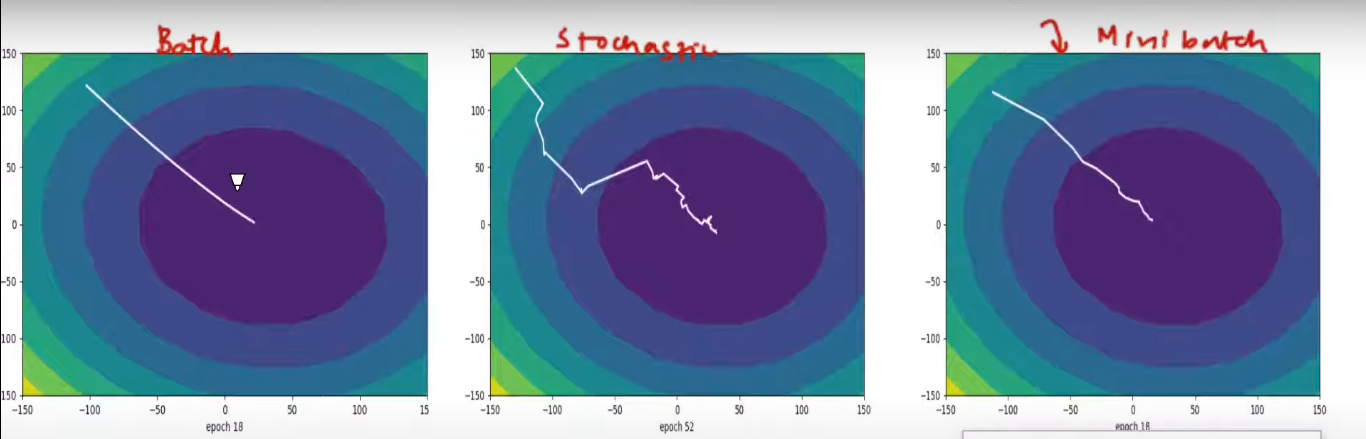

## **Mini Batch GD using Scikil learn Lib**

In [115]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(learning_rate='constant', eta0=0.2)


In [116]:
batches = 70

for i in range(100):
    idx = random.sample(range(x_train.shape[0]), batches)
    sgd.partial_fit(x_train[idx], y_train[idx])

In [117]:
pred = sgd.predict(x_test)

In [118]:
r2_score(y_test, pred)

0.4416330583288126